# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [22]:
# rename columns
df.rename({"GRADES_4_G":"ENROLL_4TH_G", "GRADES_8_G":"ENROLL_8TH_G", "GRADES_12_G":"ENROLL_12TH_G", 
           "GRADES_1_8_G":"ENROLL_PRIMARY", "GRADES_9_12_G":"ENROLL_HIGH", "GRADES_ALL_G":"ENROLL_ALL", 
           "ENROLL":"ENROLL_ALL_EST"}, axis=1,inplace=True)

# fill in missing data
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])


df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL_ALL_EST                1632 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4TH_G,ENROLL_8TH_G,ENROLL_12TH_G,ENROLL_PRIMARY,ENROLL_HIGH,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.632000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,8.948138e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.031381e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.451538e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.382535e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.002715e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [8]:
# @@@ 1
df["YEAR"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [12]:
# @@@ 2
states = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()
states.loc[["MICHIGAN", "OHIO"]]

STATE
MICHIGAN    276.166667
OHIO        282.250000
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [18]:
# @@@ 3
average_2019 = df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()
average_2019

np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [20]:
# @@@ 4
states = df.groupby("STATE")["AVG_MATH_8_SCORE"].max()
states

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
df["edu_expenditure_percent"] = df["TOTAL_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["support_expenditure_percent"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["cap_outlay_expenditure_percent"] = df["CAPITAL_OUTLAY_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["state_average"] = df.groupby("STATE")["AVG_MATH_8_SCORE"].transform("mean")

Feature engineering justification:

1. Added column showing education expenditure as a percentage of revenue to account for statewide differences in size.

2. Added percentage categories for support and capital outlay because certain spending areas could be more beneficial to improving education quality and student performace.

3. Added state average to see if geographical trends affect educational performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

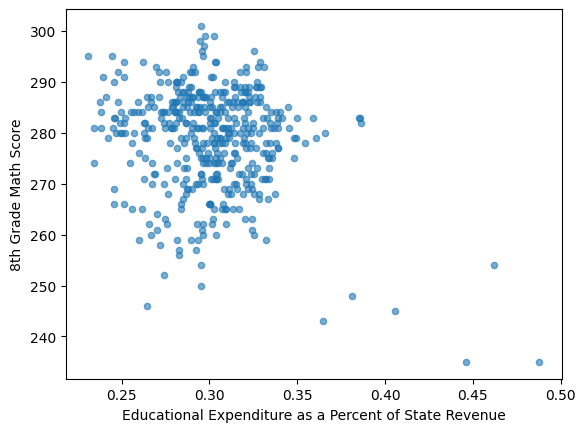

In [28]:
# @@@ 6
df.plot.scatter(x="support_expenditure_percent", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Educational Expenditure as a Proportion of State Revenue")
plt.ylabel("8th Grade Math Score")

It seems as if spending on educational support services doesn't correlate well with increase 8th grade math scores. This could be attributed to a number of factors (e.g. students not engaging with support services, etc.)

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

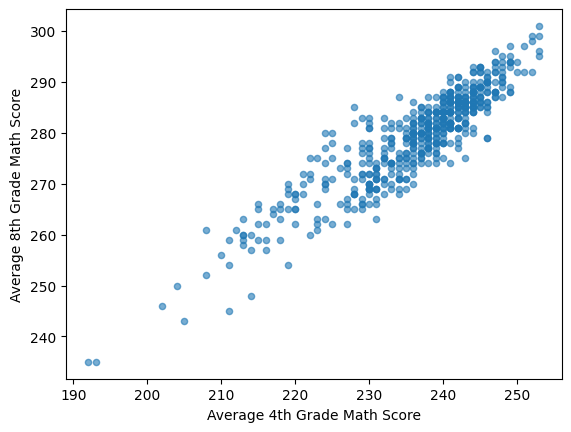

In [29]:
# @@@ 7
df.plot.scatter(x="AVG_MATH_4_SCORE", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Average 4th Grade Math Score")
plt.ylabel("Average 8th Grade Math Score")

Average 4th and 8th grade math scores are very well correlated. This could mean students who get on track from an early age stay on track, potentially suggesting educators to invest in early education to establish better habits.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# @@@ 8

X = df[["AVG_MATH_4_SCORE", "AVG_READING_8_SCORE", "TOTAL_EXPENDITURE"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]
y.fillna(y.median(), inplace=True)

In [56]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [57]:
# @@@ 10
from sklearn.linear_model import LinearRegression


In [58]:
# @@@ 11
# create your model here
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [60]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [61]:
# @@@ 12
np.mean(model.predict(X_test)-y_test)
model.score(X_test, y_test)

0.9223844843899092

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

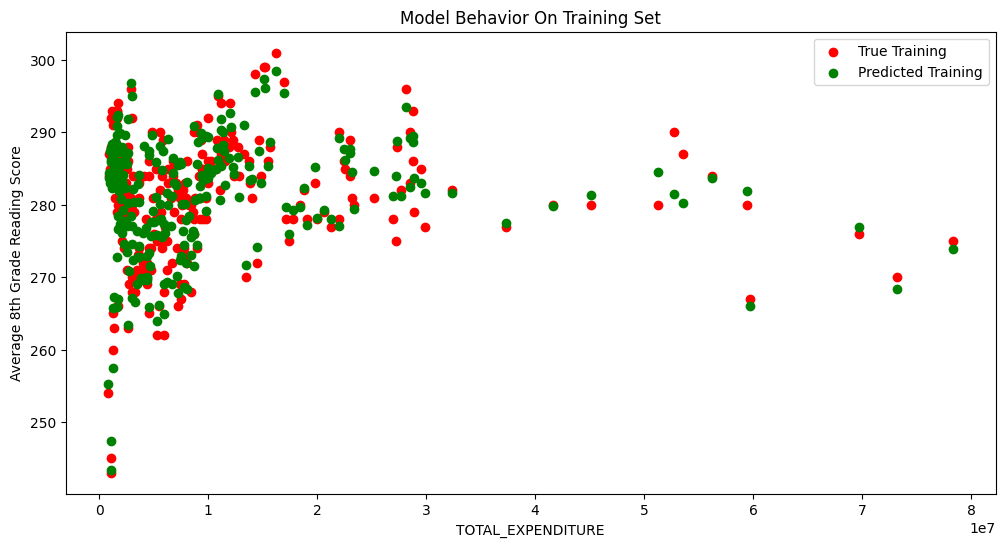

In [62]:
# @@@ 13

col_name = 'TOTAL_EXPENDITURE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train['TOTAL_EXPENDITURE'], y_train, color = "red")
plt.scatter(X_train['TOTAL_EXPENDITURE'], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('TOTAL_EXPENDITURE')
plt.ylabel('Average 8th Grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

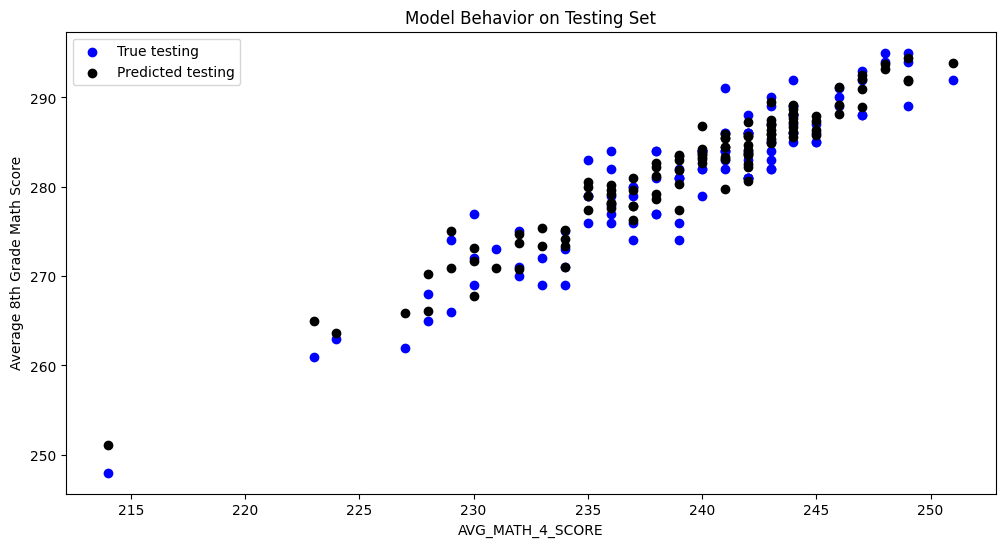

In [63]:
# @@@ 14


col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test['AVG_MATH_4_SCORE'], y_test, color = "blue")
plt.scatter(X_test['AVG_MATH_4_SCORE'], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior on Testing Set")